In [4]:
import networkx as nx
import matplotlib.pyplot as plt


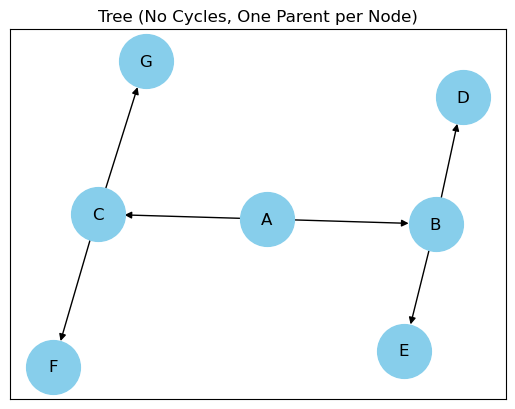

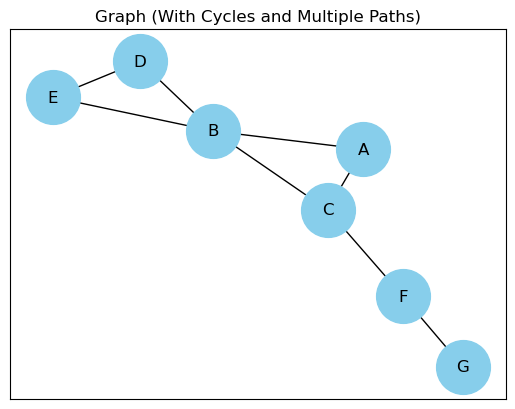

In [4]:
#Implementing a tree and graph to viz the difference


def draw_graph(G, title):
    pos = nx.spring_layout(G)
    nx.draw_networkx(G, pos, with_labels=True, arrows = True, node_color = 'skyblue', node_size = 1500)
    plt.title(title)
    plt.show()

#Create Tree
tree = nx.DiGraph()
tree.add_edges_from([
    ('A', 'B'),
    ('A', 'C'),
    ('B', 'D'),
    ('B', 'E'),
    ('C', 'F'),
    ('C', 'G'),
])

#Create Graph
graph = nx.Graph()
graph.add_edges_from([
    ('A', 'B'),
    ('B', 'C'),
    ('C', 'A'),  # cycle
    ('B', 'D'),
    ('D', 'E'),
    ('E', 'B'),  # cycle
    ('C', 'F'),
    ('F', 'G'),
])

draw_graph(tree, "Tree (No Cycles, One Parent per Node)")
draw_graph(graph, "Graph (With Cycles and Multiple Paths)")

In [3]:
#Breath  First Search (:Shortest Path)'
from collections import deque
import networkx as nx

tree = nx.DiGraph()
tree.add_edges_from([
    ('A', 'B'),
    ('A', 'C'),
    ('B', 'D'),
    ('B', 'E'),
    ('C', 'F'),
    ('C', 'G'),
])

start_node = 'A'
goal_node = 'F'

#Init Queue

queue = deque([(start_node, [start_node])])
visited = set()

while queue:
    current_node, path = queue.popleft()
    if current_node == goal_node:
        print('Shortest path found:', path)
        break
    if current_node not in visited:
        visited.add(current_node)
        for neighbor in tree.neighbors(current_node):
            if neighbor not in visited:
                queue.append([neighbor, path + [neighbor]])  #Path is the list of neighbors we have taken so far to reach current node

Shortest path found: ['A', 'C', 'F']


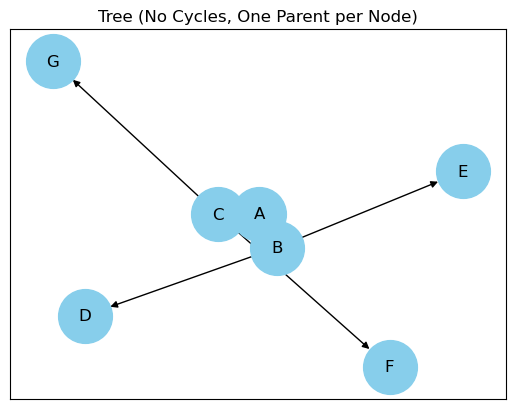

In [10]:
draw_graph(tree, "Tree (No Cycles, One Parent per Node)")

In [5]:
tree.add_edges_from([
    ('A', 'B'),
    ('A', 'C'),
    ('B', 'D'),
    ('B', 'E'),
    ('C', 'F'),
    ('C', 'G'),
    ('D', 'H'),
    ('E', 'I'),
    ('F', 'J'),
    ('G', 'K')
])


In [23]:

def bfs(start_node, goal_node):
    queue = deque([(start_node, [start_node])])
    visited = set()
    while queue:
        current_node, path = queue.popleft()
        if current_node == goal_node:
            return f'Shortest path found: {path}'
            break
            return None
        if current_node not in visited:
            visited.add(current_node)
            for neighbor in tree.neighbors(current_node):
                if neighbor not in visited:
                    queue.append([neighbor, path + [neighbor]])
    return None

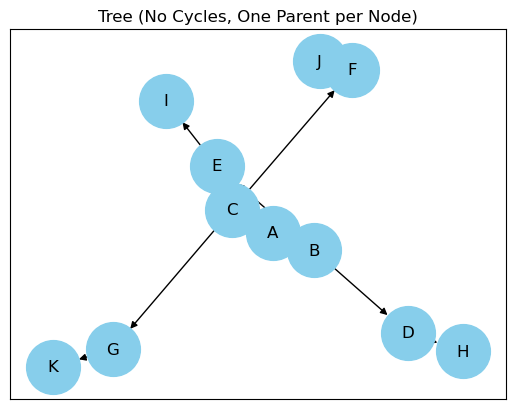

In [8]:
draw_graph(tree, "Tree (No Cycles, One Parent per Node)")

In [12]:
#Return true if path exist and save memory
start_node = 'A'
goal_node = 'K'
queue = deque([start_node])
visited = set()
while queue:
    current_node =  queue.popleft()
    if current_node == goal_node:
        print('Path Exist')
        break
    if current_node is not visited:
        visited.add(current_node)
        for neighbor in tree.neighbors(current_node):
            if neighbor not in visited:
                queue.append(neighbor)


Path Exist


In [12]:
from collections import deque

In [15]:
#Track level with each node
start_node = 'A'
goal_node = 'K'
queue = deque([(start_node, 0)])
visited = set()
while queue:
    current_node, steps = queue.popleft()
    if current_node == goal_node:
        print(f'Path Exist {start_node} to {goal_node}  is {steps}')
        break
    if current_node not in visited:
        visited.add(current_node)
        for neighbor in tree.neighbors(current_node):
            if neighbor not in visited:
                queue.append((neighbor, steps + 1))

Path Exist A to K  is 3


In [51]:
class Node:
    def __init__(self, name):
        self.name = name
        self.children = []

    def add_child(self, node):
        self.children.append(node)

# Define the custom tree structure
A = Node('A')
B = Node('B')
C = Node('C')
D = Node('D')
E = Node('E')
F = Node('F')
G = Node('G')
H = Node('H')
I = Node('I')
J = Node('J')
K = Node('K')
L = Node('L')
M = Node('M')
N = Node('N')
O = Node('K')  # Goal node far away on wrong path

A.add_child(B)
A.add_child(C)

B.add_child(D)
D.add_child(E)
E.add_child(F)
F.add_child(G)
G.add_child(H)
H.add_child(I)
I.add_child(J)
J.add_child(K)  # Deep path

C.add_child(K)  # Shortcut — only 2 steps



In [2]:
def build_graph(node, graph=None):
    if graph is None:
        graph = nx.DiGraph()
    for child in node.children:
        graph.add_edge(node.name, child.name)
        build_graph(child, graph)
    return graph

def hierarchy_pos(G, root, width=1.0, vert_gap=0.2, vert_loc=0, xcenter=0.5, pos=None, parent=None):
    if pos is None:
        pos = {}
    neighbors = list(G.successors(root))  # Use successors for directed graphs

    if not neighbors:
        pos[root] = (xcenter, vert_loc)
    else:
        dx = width / len(neighbors)
        next_x = xcenter - width / 2 - dx / 2
        for neighbor in neighbors:
            next_x += dx
            pos = hierarchy_pos(G, root=neighbor, width=dx, vert_gap=vert_gap,
                                vert_loc=vert_loc - vert_gap, xcenter=next_x, pos=pos, parent=root)
        pos[root] = (xcenter, vert_loc)

    return pos

def draw_tree(graph, root):
    pos = hierarchy_pos(graph, root)
    nx.draw(graph, pos, with_labels=True, arrows=True, node_color='skyblue', node_size=1500)
    plt.title("Clean Tree Layout (Top-Down)")
    plt.show()


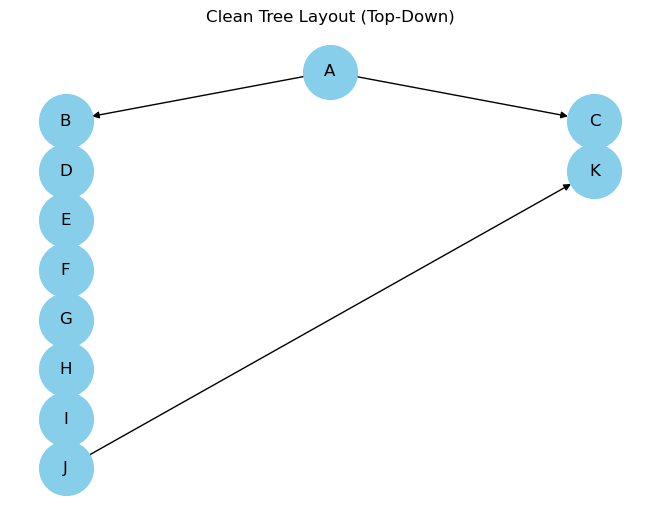

In [52]:

tree_graph = build_graph(A)
draw_tree(tree_graph, root='A')


In [43]:

def bfs(start_node, goal_node):
    queue = deque([(start_node, [start_node.name])])
    visited = set()
    while queue:
        current_node, path = queue.popleft()
        if current_node.name == goal_node:
            return f'Shortest path found: {path}'
            break
        visited.add(current_node)
        for neighbor in current_node.children:
            if neighbor not in visited:
                queue.append((neighbor, path + [neighbor.name]))
    return None


In [53]:
#DFS
def dfs(start_node, goal_node, visited=None, path=None):
    if visited is None:
        visited = set()
    if path is None:
        path = []
    path.append(start_node.name)
    visited.add(start_node.name)
    if start_node.name == goal_node:
        return path
    for child in start_node.children:
        if child.name not in visited:
            result = dfs(child, goal_node, visited, path.copy())
            if result:
                return result
    return None


In [56]:
print("DFS:", dfs(A, 'K'))
print("BFS:", bfs(A, 'K'))


DFS: ['A', 'B', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K']
BFS: Shortest path found: ['A', 'C', 'K']


In [64]:
##Depth-Limited DFS
def depth_limited_dfs(start_node, goal_node, max_depth=5):
    if max_depth == 0:
        return None
    if start_node.name == goal_node:
        return [start_node.name]
    for child in start_node.children:
        result = depth_limited_dfs(child, goal_node, max_depth - 1)
        if result:
            return [start_node.name] + result
    return None

In [65]:
print("DLS depth=2:", depth_limited_dfs(A, 'K', max_depth=2))  # Should return None
print("DLS depth=10:", depth_limited_dfs(A, 'K', max_depth=10))  # Should return the real path


DLS depth=2: None
DLS depth=10: ['A', 'B', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K']


In [68]:
def iddfs(start, goal, max_depth):
    for depth in range(max_depth + 1):
        result = depth_limited_dfs(start, goal, depth)
        if result is not None:
            return result
    return None

In [73]:
print("DLS depth=2:", depth_limited_dfs(A, 'K', max_depth=2))  # Should return None
print("DLS depth=10:", depth_limited_dfs(A, 'K', max_depth=10))  # Should return the real path
print("IDDFS depth=:", iddfs(A, 'K', max_depth=12))

DLS depth=2: None
DLS depth=10: ['A', 'B', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K']
IDDFS depth=: ['A', 'C', 'K']
